In [269]:
import numpy as np
from matplotlib import pyplot as plt

In [270]:
#load dataset
u = np.loadtxt("../lab2_1_data.csv", delimiter=",", unpack=True)
print(u)

[[ 0.74589   -0.43265  ]
 [ 0.43352   -0.53858  ]
 [ 0.34667   -0.35825  ]
 [ 0.43563   -0.95307  ]
 [ 0.87224   -0.59757  ]
 [ 0.91057   -0.7319   ]
 [ 0.53584   -0.75979  ]
 [ 0.34912   -0.31302  ]
 [ 0.54057   -0.56459  ]
 [ 0.46997   -0.97972  ]
 [ 0.70024   -0.38539  ]
 [ 0.77378   -0.29958  ]
 [ 0.82682   -0.64523  ]
 [ 0.14546   -0.23598  ]
 [ 0.68834    0.28251  ]
 [ 0.35971   -0.10906  ]
 [ 0.81554   -0.74388  ]
 [ 0.48447   -0.79279  ]
 [ 0.29453   -0.70226  ]
 [ 0.64096   -0.2039   ]
 [ 0.45428   -0.53894  ]
 [ 0.63494   -0.40594  ]
 [ 0.37933   -0.12101  ]
 [ 0.23349   -0.51425  ]
 [ 0.90886   -0.57161  ]
 [ 0.43876   -0.16906  ]
 [ 0.33963   -0.66784  ]
 [ 0.41841   -0.61187  ]
 [ 0.42219   -0.42756  ]
 [ 0.25524   -0.59752  ]
 [ 0.5083    -0.81311  ]
 [ 0.84596   -0.31124  ]
 [ 0.14035   -0.92162  ]
 [ 0.39587   -1.0015   ]
 [ 0.63698   -0.75599  ]
 [ 0.3541    -0.47215  ]
 [ 0.68447    0.015025 ]
 [ 0.33946   -0.43013  ]
 [ 0.55213   -0.54293  ]
 [ 0.79272    0.093924 ]


In [271]:
def linear_model(u,w):
    return np.dot(u,w)

In [272]:
#w = np.transpose(np.array([np.random.rand(100),np.random.rand(100)]))
w = np.random.rand(len(u), 2)*2 - 1 

#print('\n\n w',w)
#print('\n\n u',u)
#v = linear_model(u[0], w[0])
#print('\n\n v',v)

10000
460.1211513510651
65.23831300786156
178.55673213225097
297.6759485322151
593.1404977910364
561.632759192009
189.65612345807196
178.1700447036413
278.7089065709299
328.2132709436892
503.94775437043006
431.60285049862506
162.53983290446442
43.65151375580022
188.80944459471638
189.6843965968351
79.22112951322711
521.4445328562748
394.26866946452463
14.417471691730512
140.58057310661857
317.4106508265252
34.06397237378474
467.8841390968268
116.38713398509266
80.67198919868908
27.339476597690066
80.37149941652457
219.4510898644837
91.77323279736561
442.01055168315753
94.1181797565967
253.16677901993924
295.7470999339962
292.05149059032834
282.98705303486884
321.09750410188946
352.5793034102053
39.27213729031833
286.19169043209155
261.40784752400936
195.34755759275345
269.07129014037395
130.64524893674923
315.6791815785956
124.37616615568116
9.297581868240547
291.26858333223953
364.7270132340008
55.06781898634824
311.1633586677213
83.2338667954871
293.377517803535
128.01220398794263
32

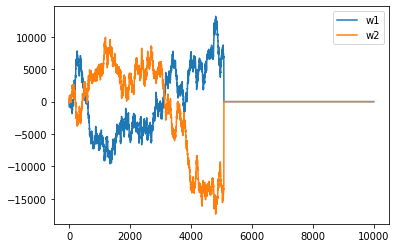

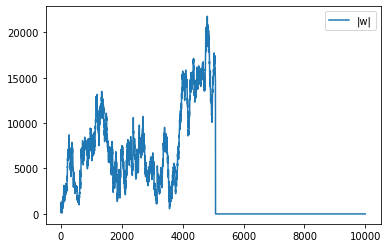

In [282]:
#3) Implement Basic Hebb Rule
eta = 1000

epochs = 100
v = np.zeros(len(u))
w1 = np.zeros(len(u)*epochs)
w2 = np.zeros(len(u)*epochs)
print(len(w1))

ww = w[0]
j = 0
stop = False
for N in range (epochs):
    uu = np.random.permutation(u)  #va bene? 
    for i in range (len(uu)):
        v[i] = linear_model(uu[i], w[i])
        wold = ww
        ww = ww + eta*np.dot(v[i],u[i])
        print(np.linalg.norm(ww-wold))
        w1[j] = ww[0]
        w2[j] = ww[1]
        j=j+1
        if (np.linalg.norm(ww-wold)) < 0.1:
            stop = True
            break
    if stop == True:
        break


w_norm = np.sqrt(w1**2+w2**2)
t=np.arange(0,len(w1))

plt.figure()
plt.plot(t,w1, label='w1')
plt.plot(t,w2, label='w2')
plt.legend()

plt.figure()
plt.plot(t,w_norm, label='|w|')
plt.legend()
plt.show()


[-18010.80959457  25664.24622309]
[[ 0.32640973 -0.25904598]
 [-0.25904598  0.321666  ]]


 max eigvect [ 0.71033647 -0.70386228]
0.7103364653931533


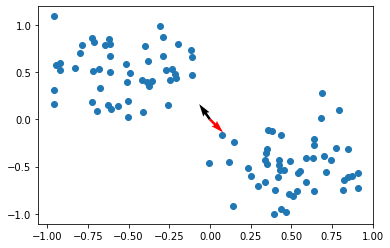

In [274]:
#P1
u1 = (np.transpose(u))[0]
u2 = (np.transpose(u))[1]

print(ww)

plt.scatter(u1,u2)
#plt.scatter(*ww, color= 'r')
plt.quiver(*ww)
#plt.xlim(-12,1)
#plt.ylim(-1,10)

Q = np.array([[0,0], [0,0]])
for i in range (len(u)):
     Q = Q + np.outer(u[i],u[i])

Q = Q/len(u)

print(Q)
eig_val, eig_vec = np.linalg.eig(Q)
#print(eig_val)
n = np.argmax(eig_val)
max_eigvect = eig_vec[:,n]
print('\n\n max eigvect',max_eigvect)

print(max_eigvect[0])
plt.quiver(max_eigvect[0], max_eigvect[1], color='red')

plt.show()



In [275]:
#calculate correlation matrix
